# Autour du SARS-CoV-2 (Covid-19)

Le but est ici de reproduire des graphes semblables à ceux du [South China Morning Post](https://www.scmp.com/) (SCMP), sur la page [The Coronavirus Pandemic](https://www.scmp.com/coronavirus?src=homepage_covid_widget) et qui montrent pour différents pays le nombre cumulé (c’est-à-dire le nombre total de cas depuis le début de l’épidémie) de personnes atteintes de la [maladie à coronavirus 2019](https://fr.wikipedia.org/wiki/Maladie_%C3%A0_coronavirus_2019).

Les données que nous utiliserons dans un premier temps sont compilées par le [Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)](https://systems.jhu.edu/) et sont mises à disposition sur [GitHub](https://github.com/CSSEGISandData/COVID-19). C'est plus particulièrement sur les données `time_series_covid19_confirmed_global.csv` (des suites chronologiques au format csv) disponibles [ici](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv) que nous allons nous concentrer.

## Téléchargement et traitement des données

Les données relevées sont stockées dans un fichier. Celles-ci sont à la date du 22 juin 2021.

In [1]:
data_file = "time_series_covid19_confirmed_global.csv"
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)
data_file

'time_series_covid19_confirmed_global.csv'

In [2]:
import pandas as pd

raw_data = pd.read_csv(data_file, sep=',')

On s'intéressera ici spécifiquement aux données de la **Belgique**, la **Chine** (en traitant **Hong-Kong** à part), la **France métroploitaine**, l'**Allemagne**, l'**Iran**, l'**Italie**, le **Japon**, la **Corée du Sud**, les **Pays-Bas** (*hors colonies*), le **Portugal**, l'**Espagne**, le **Royaume-Uni** (*hors colonies*) et les **États-Unis**.

[//]: # "Initialement, il est demandé de tenir compte également de la **Chine** (en traitant **Hong-Kong** à part). Cependant, et comme on peut le voir juste au dessus, le format utilisé pour le fichier `.csv` traite chacune des 34 provinces chinoises à part, avec aucune donnée générale sur la Chine. Plusieurs choix s'offrent à nous : reconstituer une ligne *globale* pour ce pays en mélangeant **toutes** ses provinces, faire la même chose en gardant de côté **Hong-Kong** pour coller à la consigne ou se simplifier la vie en mettant de côté les données chinoises."

[//]: # "Je choisis cette dernière options pour plusieurs raisons. La première, et plus évidente, est la facilité : je ne pense pas parvenir à mélanger toutes les provinces de la Chine efficacement/élégamment, et suis presque certain d'effectuer une erreur en m'y frottant. Par ailleurs, on remarque en lisant l'énoncé de cet exercice :"

[//]: # "> Les données de la Chine apparaissent par province et nous avons séparé Hong-Kong, non pour prendre parti dans les différences entre cette province et l’état chinois, mais parce que c’est ainsi qu’apparaissent les données sur le site du SCMP."

[//]: # "Ce qui laisse penser que cette difficulté n'est pas initialement prévue, et que la consigne initiale est tournée de manière à ne pas devoir réaliser de fusion de lignes. Pour toutes ces raisons, laisser de côté les données pour la **Chine** me semble à la fois bien plus judicieux en terme de temps, mais aussi plus proche de l'intention initiale de la consigne."

In [3]:
selectedCountries = ['Belgium', 'France', 'China', 'Germany', 'Iran', 'Italy',
                    'Japan', 'Korea,South', 'Netherlands', 'Portugal', 'Spain',
                    'United Kingdom', 'US']

selectedData = raw_data[raw_data['Country/Region'].isin(selectedCountries)]

Pour tous les pays - sauf la Chine - les données hors provinces/colonies présentent `NaN` dans leur colonne `Province/State`. On peut donc récupérer d'une part toutes les données chinoises, et d'autre part les données des autres pays.

In [4]:
dataChina = selectedData[selectedData['Country/Region'] == 'China']

In [5]:
dataOther = selectedData[selectedData['Province/State'] != selectedData['Province/State']]

On peut finalement concaténer ces deux jeux de données.

In [6]:
data = pd.concat([dataOther, dataChina]).sort_index()
data

Province/State  Country/Region        Lat        Long  1/22/20  1/23/20  \
23              NaN         Belgium  50.833300    4.469936        0        0   
58            Anhui           China  31.825700  117.226400        1        9   
59          Beijing           China  40.182400  116.414200       14       22   
60        Chongqing           China  30.057200  107.874000        6        9   
61           Fujian           China  26.078900  117.987400        1        5   
62            Gansu           China  35.751800  104.286100        0        2   
63        Guangdong           China  23.341700  113.424400       26       32   
64          Guangxi           China  23.829800  108.788100        2        5   
65          Guizhou           China  26.815400  106.874800        1        3   
66           Hainan           China  19.195900  109.745300        4        5   
67            Hebei           China  39.549000  116.130600        1        1   
68     Heilongjiang           China  47.862000  127.761500        0        2   
69            Henan           China  37.895700  114.904200        5        5   
70        Hong Kong           China  22.300000  114.200000        0        2   
71            Hubei           China  30.975600  112.270700      444      444   
72            Hunan           China  27.610400  111.708800        4        9   
73   Inner Mongolia           China  44.093500  113.944800        0        0   
74          Jiangsu           China  32.971100  119.455000        1        5   
75          Jiangxi           China  27.614000  115.722100        2        7   
76            Jilin           China  43.666100  126.192300        0        1   
77         Liaoning           China  41.295600  122.608500        2        3   
78            Macau           China  22.166700  113.550000        1        2   
79          Ningxia           China  37.269200  106.165500        1        1   
80          Qinghai           China  35.745200   95.995600        0        0   
81          Shaanxi           China  35.191700  108.870100        0        3   
82         Shandong           China  36.342700  118.149800        2        6   
83         Shanghai           China  31.202000  121.449100        9       16   
84           Shanxi           China  37.577700  112.292200        1        1   
85          Sichuan           China  30.617100  102.710300        5        8   
86          Tianjin           China  39.305400  117.323000        4        4   
87            Tibet           China  31.692700   88.092400        0        0   
88          Unknown           China        NaN         NaN        0        0   
89         Xinjiang           China  41.112900   85.240100        0        2   
90           Yunnan           China  24.974000  101.487000        1        2   
91         Zhejiang           China  29.183200  120.093400       10       27   
130             NaN          France  46.227600    2.213700        0        0   
134             NaN         Germany  51.165691   10.451526        0        0   
149             NaN            Iran  32.427908   53.688046        0        0   
153             NaN           Italy  41.871940   12.567380        0        0   
155             NaN           Japan  36.204824  138.252924        2        2   
197             NaN     Netherlands  52.132600    5.291300        0        0   
214             NaN        Portugal  39.399900   -8.224500        0        0   
237             NaN           Spain  40.463667   -3.749220        0        0   
253             NaN              US  40.000000 -100.000000        1        1   
268             NaN  United Kingdom  55.378100   -3.436000        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20    ...      6/12/21   6/13/21  \
23         0        0        0        0    ...      1075765   1076338   
58        15       39       60       70    ...         1004      1004   
59        36       41       68       80    ...         1069      1070   
60        27       57       75  

On remarque d'ailleurs, pour la Chine (`index 88`), une ligne vide sans intérêt pour la suit de nos travaux car pleine de *zéros* ; on la supprime.

In [7]:
data = data.drop([88])

## Visualisation des données

On cherche à visualiser le nombre cumulé de cas à chaque date disponible.
Présentons dans un premier temps les données telles qu'elles.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# Extraction des dates, lieux et nombre de cas cumulés
dates = data.keys()[4:]         # Dates
place = data.get_values()[:,:2] # [Province , Country]
cases = data.get_values()[:,4:] # Cas

Reformattons les noms des différents pays/régions pour plus de lisibilité. Passons ainsi du format
 `[Province, Country]`
au format
  `[Country (-Province?)]`
où l'on ne précise la province que si c'est nécessaire.

In [9]:
def convert_location_names(place) :
    places = []
    for i in range(len(place)) :
        newDate = place[i,1]
        # Cas où la province est spécifiée (non- 'NaN')
        if not place[i,0] != place[i,0] :
            newDate = newDate + " - " + place[i,0]
        places.append(newDate)
    return places
place = convert_location_names(place) # Attention à ne pas réexécuter plusieurs fois cette cellule

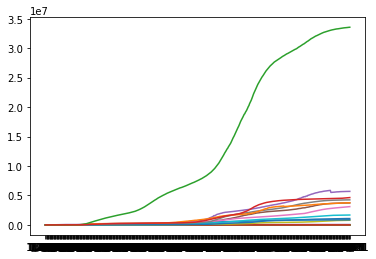

In [16]:
for i,p in enumerate(place) :
    plt.plot(dates, cases[i,:], label=p)
# On ne montre pas toutes les dates pour plus de lisibilité

plt.show()